In [2]:
%load_ext lab_black

In [3]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [4]:
import os

os.sys.path.append("../")

In [5]:
import numpy as np

In [6]:
import pandas as pd

# Show all the columns and rows in pandas df
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)

In [7]:
import matplotlib.pyplot as plt

In [9]:
import mplhep

mplhep.style.use("CMS")

The examples use uproot3 so let's stick to using this

In [10]:
import uproot3

# Read as dataframe

Let's use uproot 4 for this

In [11]:
import uproot

In [12]:
uproot.__version__

'4.1.7'

In [13]:
!ls -lh ../00.root

-rw-r--r--  1 lucas  staff   493M  8 Nov 09:50 ../00.root


In [14]:
f4 = uproot.open("../00.root")

In [15]:
df = f4["L1TrackNtuple/eventTree;1"].arrays(library="pd")

In [16]:
trk = df[0]

In [17]:
tp = df[1]

In [18]:
tp.head()

tp_pt    tp_eta    tp_phi   tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                
0     0         100.300301 -0.898876  0.061430  0.00125  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.00125  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.00125  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.00125  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.00125  0.001264  3.499881   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   

                matchtrk_z0  matchtrk_d0  matchtrk_chi2  matchtrk_bendchi2  \
entry subentry                                                               
0     0            3.574219       -999.0       7.661629           0.025519   
      1            3.750000       -999.0       8.667765           1.376251   
      2            3.574219       -999.0       4.947954           1.358919   
      3            3.574219       -999.0       3.709781           0.449784   
      4            3.457031       -999.0      18.657181           0.499871   

                matchtrk_nstub  matchtrk_lhits  matchtrk_dhits  matchtrk_seed  \
entry subentry                                                                  
0     0                      6          111111               0              0   
      1                      6              11            1111              0   
      2                      6          111111               0              0   
      3                      5          111011               0              0   
      4                      6              11            1111              0   

                matchtrk_injet  matchtrk_injet_highpt  matchtrk_injet_vhighpt  \
entry subentry                                                                  
0     0                      1                      1                       0   
      1                      0                      0                       0   
      2                      0                      0                       0   
      3                      1                      0                       0   
      4                      1                      0                       0   

                loosematchtrk_pt  loosematchtrk_eta  loosematchtrk_phi  \
entry subentry                                                       

uproot read this data into a multi-indexed pandas dataframe. The main index 'entry' represents the event number and then second level index. 'subentry' is the entry for each track in the event. This is better than uproot3 that reads each event with a list of tp parameters that are difficult to access.

**Assume we only care about the "truth" tracking parameters for the clustering**

In [19]:
tp.groupby(["entry"])["tp_pt"].mean()[1]

3.4658437

Let's see what the first event looks like

In [20]:
event1 = tp.loc[0, :]

In [21]:
import matplotlib

In [22]:
import random

In [24]:
random.random()

0.28542652595065376

for plotting purposes lets find out the mean z0 for each cluster and count the number of tracks belong to each cluster so we can size them accordingly.

In [25]:
mean_z0 = event1.groupby(["tp_eventid"]).agg({"tp_eventid": "count", "tp_z0": "mean"})

In [26]:
colors = [
    matplotlib.cm.Spectral(float(i) / 10 * random.random()) for i in range(len(mean_z0))
]

In [27]:
mean_z0["tp_z0"][0]

3.444006

In [28]:
random.uniform(0.950, 1.050)

0.9867714462474566

In [29]:
mean_z0.index.values

array([  0,   6,   7,   8,  19,  20,  21,  22,  26,  42,  43,  45,  46,
        60,  61,  68,  71,  73,  78,  87,  88,  92,  93, 107, 114, 116,
       119, 126, 127, 138, 139, 142, 148, 155, 156, 157, 161, 162, 166,
       170, 172, 173, 175, 182, 184, 187, 188, 192, 194, 198, 199, 202,
       207, 211])

ValueError: 'c' argument has 22 elements, which is inconsistent with 'x' and 'y' with size 54.

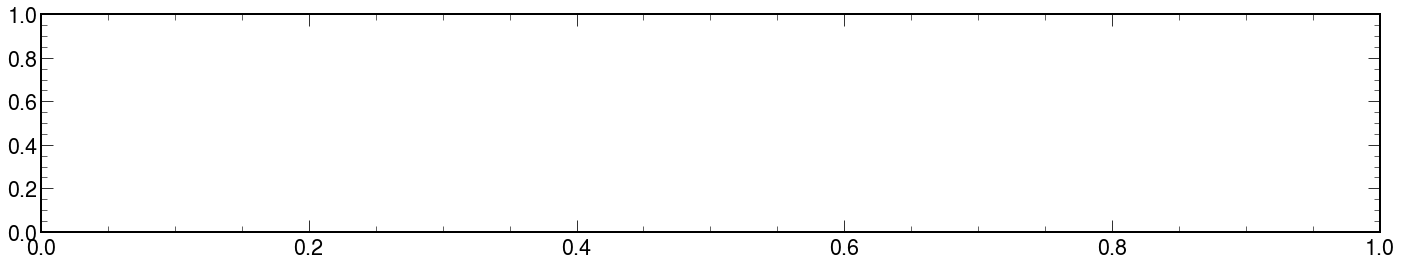

In [93]:
fig, ax = plt.subplots(figsize=(24, 4))
ax.scatter(
    mean_z0["tp_z0"], len(mean_z0) * [1], s=mean_z0["tp_eventid"] * 20, color=colors
)
ax.set_xlabel(r"$z_{0}$ [cm]", fontsize=32)
y = 1
for i, (txt, x) in enumerate(zip(mean_z0.index.values, mean_z0["tp_z0"].values)):
    #     if y == 0:
    #         y = 1.025
    #     else:
    #         y = 0.975

    ax.annotate(txt, (x, y + random.uniform(-0.050, 0.050)), fontsize=10)
ax.plot(
    mean_z0["tp_z0"][0],
    [1],
    marker="*",
    markerfacecolor="None",
    markersize=32,
    markeredgecolor="gold",
    label="primary vertex",
)
ax.legend()
_ = ax.set_yticklabels([])

I don't want to spend more time making this plot prettier (it should just be made with plotly instead, but its currently breaking my other installs).  However we can see some of the identifying features of the primary vertex reconstruction

# True Primary Vertex $z_0$

Before we can actually quantify anything about the different algorithms we use, we need to first find out what the "truth" z0 of the primary vertex actually is. To do this we will use the following procedure.
- For each event, find all the truth tracks that belong to the primary vertex by using the `tp_eventid == 0` mask
- Remove any instance of a secondary vertex by setting that $|d_0| < 0.01$ cm (Unclear as to why this is needed given the mask above)
- Take the mean of all the remaining tracks in the event and this corresponds to the "truth" or true primary vertex $z_0$.

In [31]:
mask_pv_me = tp["tp_eventid"] == 0

In [32]:
mask_no_sv_me = (tp["tp_d0"].abs()) < 0.01

In [33]:
tp.loc[mask_pv_me & mask_no_sv_me]

tp_pt    tp_eta    tp_phi    tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                 
0     0         100.300301 -0.898876  0.061430  0.001250  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.001250  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.001250  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.001250  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.001250  0.001264  3.499881   
...                    ...       ...       ...       ...       ...       ...   
24947 6          37.316452 -0.756630 -2.015774  0.184507  0.000236  0.304796   
      7          17.461126 -0.740513 -2.011680  0.184507 -0.000417  0.300494   
      8          12.040825 -1.560167  1.599031  0.052139 -0.000663  0.309680   
      9           3.084901  1.153923  2.541652  0.015098 -0.000248  0.300785   
      10          4.724505 -1.555800  1.565668  0.052139  0.001023  0.308990   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   
...                    ...         ...       ...        ...             ...   
24947 6          -0.000308    0.150999      -321          1               1   
      7           0.000447    0.150999       211          1               1   
      8           0.000682    0.191020       321          1               1   
      9           0.000255    0.322353      -211          1               1   
      10         -0.001057    0.191020      -211          2               2   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   
...                  ...         ...        ...       ...              ...   
24947 6                8           0         -1         1                1   
      7                9           0          1         1                1   
      8               11           0          1         1                0   
      9                7           0         -1         0                0   
      10              10           0         -1         1                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   
...                          ...          ...           ...           ...   
24947 6                        0    37.687820     -0.754480     -2.015893   
      7                        0    17.344629     -0.740883     -2.011434   
      8                        0    12.137454     -1.559636      1.598343   
      9                        0     3.093463      1.155117      2.541423   
      10     

In [34]:
tp

tp_pt    tp_eta    tp_phi    tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                 
0     0         100.300301 -0.898876  0.061430  0.001250  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.001250  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.001250  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.001250  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.001250  0.001264  3.499881   
...                    ...       ...       ...       ...       ...       ...   
24947 131         2.515927 -1.344955  2.283078  0.000222 -0.000221  7.912414   
      132         2.869779  1.953141 -0.978675  0.000222  0.000216  7.912527   
      133         2.205768 -1.469311 -0.762871  0.003592  0.000253  7.909946   
      134         2.010632 -1.296187  0.080920  0.001015  0.000989 -1.899230   
      135         2.424364 -1.384162  0.262355  0.001015  0.000934 -1.898866   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   
...                    ...         ...       ...        ...             ...   
24947 131         0.000219    7.912319     -2212          1               1   
      132        -0.000213    7.912319       211          1               1   
      133        -0.000266    7.902583      -321          1               1   
      134        -0.000991   -1.899601       211          0               0   
      135        -0.000935   -1.899601      -211          1               1   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   
...                  ...         ...        ...       ...              ...   
24947 131              7         149         -1         0                0   
      132              8         149          1         0                0   
      133              9         149         -1         0                0   
      134              6         155          1         0                0   
      135              6         155         -1         0                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   
...                          ...          ...           ...           ...   
24947 131                      0     2.499530     -1.347972      2.285152   
      132                      0     2.931165      1.954933     -0.979100   
      133                      0     2.195913     -1.472945     -0.762705   
      134                      0  -999.000000   -999.000000   -999.000000   
      135    

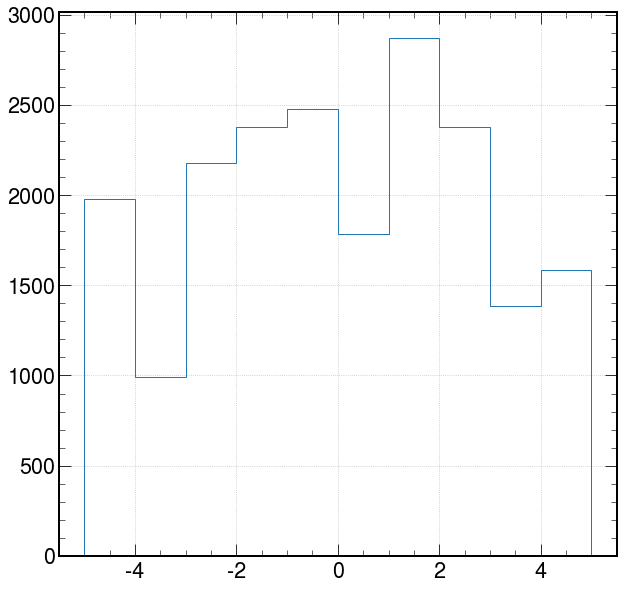

In [35]:
tp.loc[mask_pv_me & mask_no_sv_me].groupby(level=0)["tp_z0"].mean().hist(
    bins=10, range=(-5.0, 5.0), histtype="step"
)
true_z0_me = tp.loc[mask_pv_me & mask_no_sv_me].groupby(level=0)["tp_z0"].mean()

let's compare this with the solution from Rob (making sure to use uproot 3)

In [36]:
import uproot3

In [41]:
f3 = uproot3.open("../00.root")
events3 = f3["L1TrackNtuple/eventTree"]

In [42]:
tp_vertex_id = events3["tp_eventid"].array()
tp_z0 = events3["tp_z0"].array()
tp_d0 = events3["tp_d0"].array()
trk_z0 = events3["trk_z0"].array()
trk_pt = events3["trk_pt"].array()
mask = tp_vertex_id == 0
mask_no_sv = np.abs(tp_d0) < 0.01
true_z0 = tp_z0[mask & mask_no_sv].mean()
matchtrk_z0 = events3["matchtrk_z0"].array()

In [43]:
be = np.linspace(-5, 5, 11)

Text(0.5, 1.0, 'Comparing the two methods of getting the $z_0$')

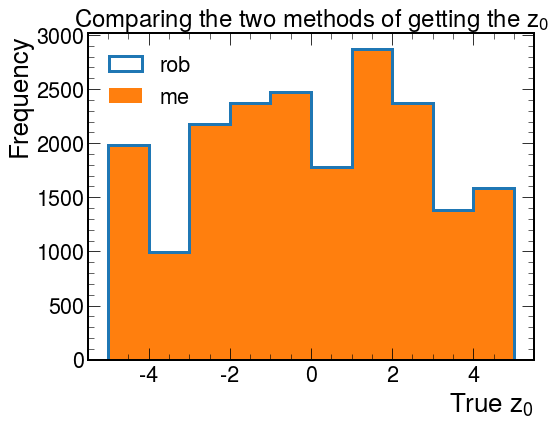

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

h_rob, _, _ = ax.hist(true_z0, bins=be, histtype="step", label="rob", lw=3)
h_me, _, _ = ax.hist(true_z0_me, bins=be, label="me", lw=0)
ax.legend()
ax.set_ylabel("Frequency")
ax.set_xlabel(r"True $z_0$")
ax.set_title("Comparing the two methods of getting the $z_0$", fontsize=24)

This compares the method I use to get the True $z_0$ which is based on reading the data as a multiindexed pandas df by using uproot 4, versus the jaggedArray that uproot 3 interprets the data as. 
With this we can now define a function to return a dataframe of all the true $z_0$ values

In [45]:
def true_z0(df: pd.DataFrame) -> pd.DataFrame:

    mask_pv = df["tp_eventid"] == 0
    mask_no_sv = np.abs(df["tp_d0"]) < 0.01

    z0 = df.loc[mask_pv & mask_no_sv].groupby(level=0)["tp_z0"].mean()
    return z0

In [46]:
z0 = true_z0(tp)

In [47]:
z0

entry
0        3.499750
1        0.338214
2       -2.649157
3        1.543104
4        2.421834
           ...   
24943    1.910414
24944   -2.066012
24945   -2.285170
24946   -4.809160
24947    0.305602
Name: tp_z0, Length: 24948, dtype: float32

# Primary Vertex Benchmarks

To quantify how well the primary vertices have been reconstructed the efficiencies can be utilized. The equation below describes the efficiency of the reconstructed primary vertices with respect to the truth primary vertices. Result should be a scalar quantity, but it can be binned as a function of $z_0$

$$ \varepsilon = \frac{N_{reco, Vx}}{N_{truth, Vx}} $$ 

The primary vertex is reconstructed correctly by the clustering algorithm if the $z_0$ is within the accepted resolution window ($\delta$), which is taken to be $\delta = 0.1$ cm

$$ |z_{truth} - z_{reco} | < \delta $$ 

In each clustering algorithm, the primary vertex is obtained by the this highest scalar sum of $p_T$ of the tracks pertaining to that cluster
$$ \sum_{tracks} p_{T}^{tracks}$$

# FastHisto - baseline

From what I understand this algorithm creates a histogram of the $z_0$ that gets weighted by the $p_T$ of the each track. From Davide Cieri's thesis, the optional bin-width of FastHisto was $\varepsilon = 0.15$ cm. This can then be used to find the Primary vertices

In [48]:
be = np.arange(-15, 15.15, 0.15)  # z_0 in [-15, 15]

Text(1, 0, '$z_0$ [cm]')

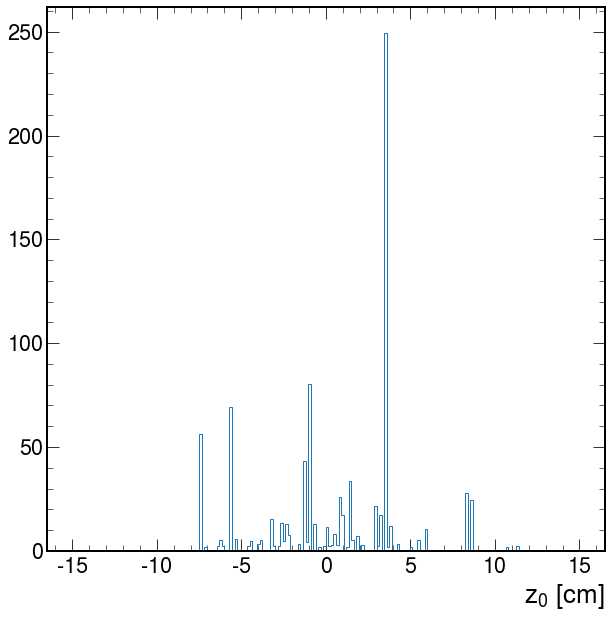

In [49]:
h, be, _ = plt.hist(
    event1["tp_z0"].values, bins=be, histtype="step", weights=event1["tp_pt"]
)
plt.xlabel(r"$z_0$ [cm]")

Quite clearly we can see where the primary vertex is.

In [50]:
np.argmax(h)

123

To find the "reco" $z_0$ from fast histo, we will find all of the tracks that fall within the bin with the highest peak and then calculate the mean. 

In [51]:
mask = (event1["tp_z0"] > be[123]) & (event1["tp_z0"] < be[124])

In [52]:
fast_histo1 = event1.loc[mask, "tp_z0"].mean()
print(fast_histo1)

3.5027883


In [53]:
z0[0]

3.4997501

In [54]:
if np.abs(fast_histo1 - z0[0]) < 0.1:
    print(
        "The primary vertex has been reconstructed within the tolerance level of 0.1 cm"
    )
else:
    print(
        "The primary vertex has NOT been reconstructed within the tolerance level of 0.1 cm"
    )

The primary vertex has been reconstructed within the tolerance level of 0.1 cm


Text(0.5, 1.0, 'FastHisto Single Event Example')

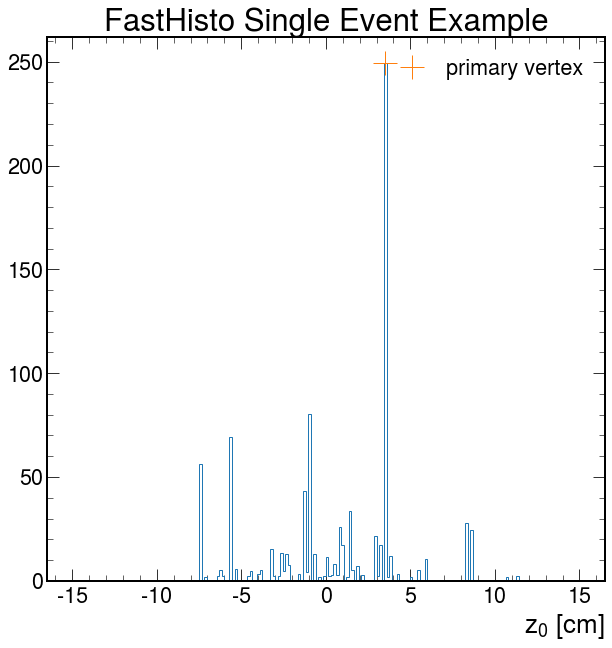

In [105]:
h, be, _ = plt.hist(
    event1["tp_z0"].values, bins=be, histtype="step", weights=event1["tp_pt"]
)
plt.plot(fast_histo1, h[123], "+", markersize=24, label="primary vertex")
plt.legend()
plt.xlabel(r"$z_0$ [cm]")
plt.title("FastHisto Single Event Example")

This serves as a check that we understand how fast histo should be used to reconstruct primary vertices. We should now wrap this into a function that does it for all of the events.

In [56]:
event1.tp_z0.values[
    np.where((event1.tp_z0.values < 3.65) & (event1.tp_z0.values > 3.50))
].mean()

3.5075552

In [57]:
def fastHisto(z0, pt, be):

    h = np.histogram(z0, bins=be, weights=pt)[0]
    max_idx = np.argmax(h)
    bin_lower = be[max_idx]
    bin_upper = be[max_idx + 1]
    mask = (z0 > bin_lower) & (z0 < bin_upper)
    z0_reco = z0[mask].mean()

    return z0_reco

In [58]:
z0_fastHisto = tp.groupby(level=0).apply(
    lambda x: fastHisto(x["tp_z0"], x["tp_pt"], be)
)

In [59]:
reco = pd.concat([z0, z0_fastHisto], axis=1)

In [60]:
reco.columns = ["z0_gen", "z0_fastHisto"]

In [61]:
def primary_vertex_efficiency(
    z0_gen: np.array, z0_reco: np.array, delta: float = 0.1
) -> pd.DataFrame:
    mask = np.abs(z0_gen - z0_reco) < delta

    total = z0_gen.shape[0]

    reconstructed = z0_gen[mask].shape[0]

    return 100 * (reconstructed / total)

In [62]:
primary_vertex_efficiency(reco["z0_gen"].values, reco["z0_fastHisto"].values)

98.01587301587301

Fast Histo seems to get a 98 \% Primary vertex reconstruction efficiency, which is pretty crazy, but this is perhaps either because it is the small subset file to test on or because it is the "truth" values that we are using to train on instead of the "track" parameters.

## Efficiency as a function of $z_{0}$

In [63]:
start, stop, step = -15, 15, 0.5
be_eff = np.arange(start, stop + step, step)

In [64]:
be_eff

array([-15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. ,
       -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,
        -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,
        -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,
         3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,
         7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,
        12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ])

In [65]:
len(be_eff)

61

In [66]:
def binominal_error(k, n):
    yerr = (1 / n) * np.sqrt(k * (1 - (k / n)))
    return yerr

In [67]:
def bin_width_error(bin_edges):
    """
    Determines the horizontal (x) error of a bin  by calculating half the bin size
    :param bin_edges:
    :return: xerr array containing the absolute magnitude of the error in x
    """
    # determines the error in a bin by +/- half of the bin_width
    xerr = []
    for k in range(len(bin_edges)):
        if k != (len(bin_edges) - 1):
            x1 = bin_edges[k]
            x2 = bin_edges[k + 1]
            bin_error = (x2 - x1) / 2
            xerr.append(bin_error)
    xerr = np.asarray(xerr)
    return xerr

In [68]:
eff = []
error_y = []
for i in range(len(be_eff)):
    if i == len(be_eff) - 1:
        break
    mask = (reco["z0_gen"] > be_eff[i]) & (reco["z0_gen"] < be_eff[i + 1])

    mask_true = np.abs(reco["z0_gen"] - reco["z0_fastHisto"]) < 0.1

    total_bin = reco[mask].shape[0]
    reco_bin = reco[mask & mask_true].shape[0]

    error_y.append(binominal_error(reco_bin, total_bin + 0.0000001))

    eff.append(reco_bin / (total_bin + 0.000001))

In [69]:
error_x = bin_width_error(be_eff)

In [70]:
bin_midpoint = 0.5 * (be_eff[:-1] + be_eff[1:])

In [71]:
bin_midpoint

array([-14.75, -14.25, -13.75, -13.25, -12.75, -12.25, -11.75, -11.25,
       -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,  -7.75,  -7.25,
        -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,  -3.75,  -3.25,
        -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,   0.25,   0.75,
         1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,   4.75,
         5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,
        13.25,  13.75,  14.25,  14.75])

Text(0, 1, 'Primary Vertex Reconstruction efficiency [%]')

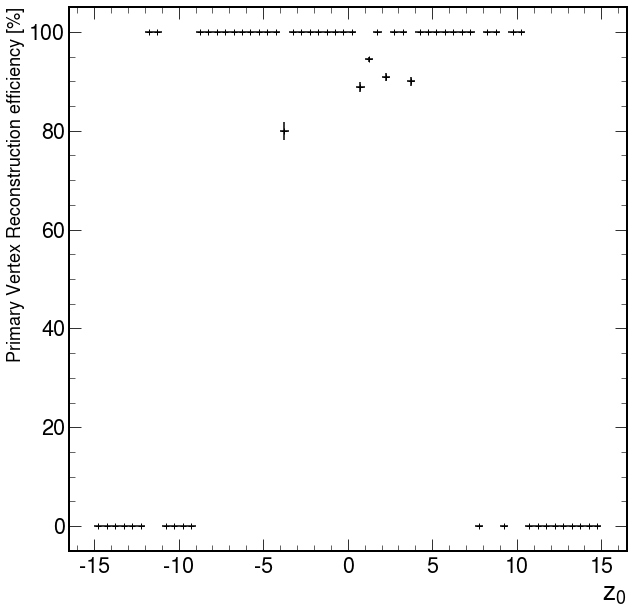

In [72]:
plt.errorbar(
    bin_midpoint,
    100 * np.array(eff),
    xerr=error_x,
    yerr=100 * np.array(error_y),
    fmt="k+",
)
plt.xlabel(r"$z_0$")
plt.ylabel("Primary Vertex Reconstruction efficiency [%]", fontsize=18)

Ok this is weird, but it could be an effect of the low stats that we have (~250 events) its also good to see that some bins seem to give reasonable values

lets wrap this around a function

In [73]:
def poissonian_error(k, n):

    yerr = (1 / n) * np.sqrt(k)

    return yerr

In [74]:
np.where((reco["z0_gen"].values > be_eff[0]) & (reco["z0_gen"].values < be_eff[1]))

(array([], dtype=int64),)

In [75]:
np.where((reco["z0_gen"].values > be_eff[0]))

(array([    0,     1,     2, ..., 24945, 24946, 24947]),)

In [76]:
np.where((reco["z0_gen"].values) < be_eff[1])

(array([], dtype=int64),)

In [77]:
def plot_pv_efficiency_z0(z0_gen: np.array, z0_reco: np.array, bins: np.array):

    eff = np.zeros(bins.shape[0] - 1)
    error_y = np.zeros(bins.shape[0] - 1)

    for i, _ in enumerate(bins):
        if i == bins.shape[0] - 1:
            break
        mask = (z0_gen > bins[i]) & (z0_gen < bins[i + 1])
        mask_true = np.abs(z0_gen - z0_reco) < 0.1
        n = z0_gen[mask].shape[0]

        k = z0_gen[mask & mask_true].shape[0]
        eff[i] = k / (n + 0.0001)
        error_y[i] = binominal_error(k, (n + 0.0001))

    x = 0.5 * (bins[1:] + bins[:-1])
    error_x = 0.5 * (bins[1:] - bins[:-1])

    plt.errorbar(
        x,
        100 * eff,
        xerr=error_x,
        yerr=100 * error_y,
        fmt="k+",
    )
    plt.xlabel(r"$z_0$")
    plt.ylabel("Primary Vertex Reconstruction efficiency [%]", fontsize=18)

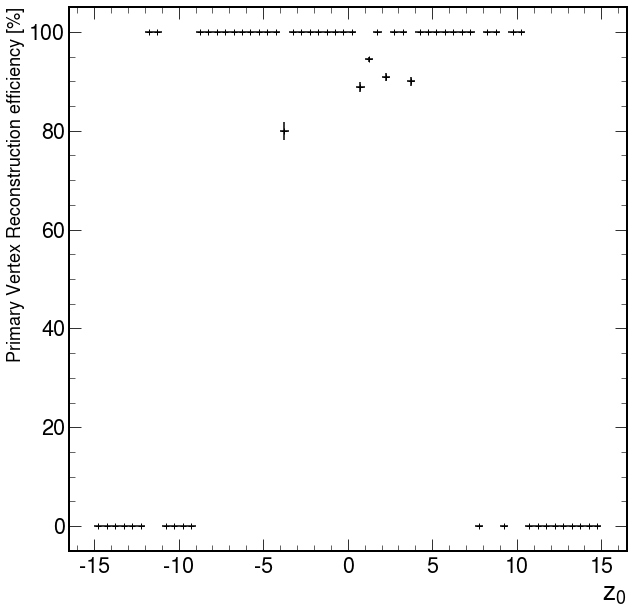

In [78]:
plot_pv_efficiency_z0(reco["z0_gen"].values, reco["z0_fastHisto"].values, bins=be_eff)

In [79]:
def plot_pv_resolution_z0(z0_gen: np.array, z0_reco: np.array, bins: np.array):

    mean_resolution = np.zeros(bins.shape[0] - 1)
    error_resolution = np.zeros(bins.shape[0] - 1)
    mask_true = np.abs(z0_gen - z0_reco) < 0.1
    for i, _ in enumerate(bins):
        if i == bins.shape[0] - 1:
            break
        mask = (z0_gen > bins[i]) & (z0_gen < bins[i + 1])
        resolution = np.abs(z0_gen[mask & mask_true] - z0_reco[mask & mask_true])

        mean_resolution[i] = np.mean(resolution)
        error_resolution[i] = np.std(resolution)

    x = 0.5 * (bins[1:] + bins[:-1])
    error_x = 0.5 * (bins[1:] - bins[:-1])

    plt.errorbar(
        x,
        mean_resolution,
        xerr=error_x,
        yerr=error_resolution,
        fmt="k+",
    )
    plt.xlabel(r"$z_0$")
    plt.ylabel(r"$|z_{Gen} - z_{reco}|$ [cm]", fontsize=18)
    plt.ylim(0, 0.05)

/Users/lucas/opt/anaconda3/envs/db-clustering/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lucas/opt/anaconda3/envs/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/Users/lucas/opt/anaconda3/envs/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lucas/opt/anaconda3/envs/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/lucas/opt/anaconda3/envs/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = 

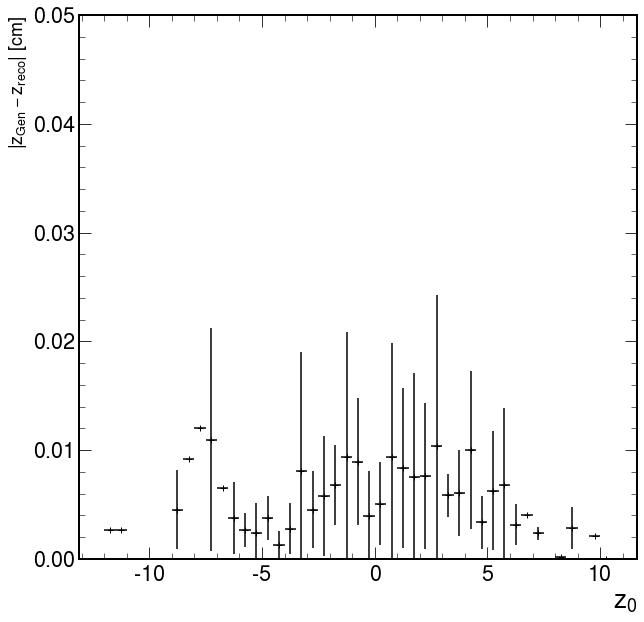

In [80]:
plot_pv_resolution_z0(reco["z0_gen"].values, reco["z0_fastHisto"].values, bins=be_eff)

# Testing dbscan

Lets test how dbscan works for this single event. The most optimal results were obtained with DBSCAN parameters:
- minPts = 2 
- $\varepsilon$ = 0.15 cm 
(from Davide Cierri)

In [81]:
from sklearn.cluster import DBSCAN

In [82]:
z0 = event1["tp_z0"].values

In [83]:
db_clustering = DBSCAN(eps=0.15, min_samples=2).fit(z0.reshape(-1, 1))

In [84]:
db_clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  2,  1,  3,  3,  3,  3,
        4, -1,  5,  5,  5,  5,  5,  4,  4,  4,  4,  6,  6,  6,  4,  4,  4,
        4,  4,  4,  4,  4,  5,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  6,  6,  6,  6,  6, -1,  3,  3,  3,  3,  3,  3,  3,  8,  8,  3,
        9,  3, -1,  3, 10, 10, 10, 10, 10,  2, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, -1,  3,  3, 12, 12, 12, 12, 12,  3, -1, 13, 13, 13,
       13, 13, 13, 13,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  6, -1,  9,
        9,  6, 14, 14, 13, 10, -1, 15, 15, 15, 15, 15,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,  3,  3,
        3,  3,  3,  3,  3, 18, 18, 18, 18, 18, -1, 17, 17,  2,  4,  4,  4,
        4,  4,  4,  4,  4,  4, -1, -1, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, -1, -1

In [85]:
len(db_clustering.labels_)

229

In [86]:
event1["dbscan_labels"] = db_clustering.labels_

/var/folders/6z/z5fs58w94yj6n956c8v6f_6r0000gn/T/ipykernel_50618/199606235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event1["dbscan_labels"] = db_clustering.labels_


In [87]:
mean_z0_dbscan = event1.groupby(["dbscan_labels"]).agg(
    {"dbscan_labels": "count", "tp_z0": "mean"}
)

In [88]:
mean_z0_dbscan.head()

,dbscan_labels,tp_z0
dbscan_labels,,
-1,12,0.521203
0,26,3.502788
1,2,1.914725
2,14,1.473794
3,29,0.628901


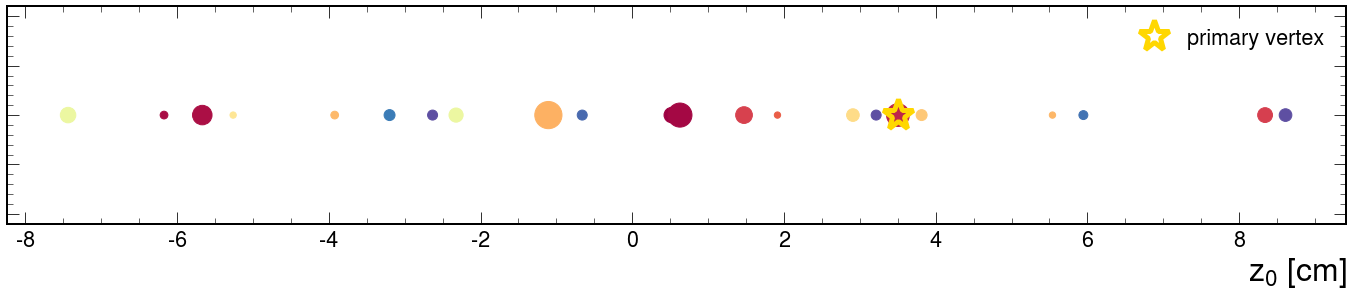

In [89]:
fig, ax = plt.subplots(figsize=(24, 4))
colors = [
    matplotlib.cm.Spectral(float(i) / 10 * random.random())
    for i in range(len(mean_z0_dbscan))
]
ax.scatter(
    mean_z0_dbscan["tp_z0"],
    len(mean_z0_dbscan) * [1],
    s=mean_z0_dbscan["dbscan_labels"] * 20,
    color=colors,
)
ax.set_xlabel(r"$z_{0}$ [cm]", fontsize=32)
y = 1
# for i, (txt, x) in enumerate(zip(mean_z0.index.values, mean_z0["tp_z0"].values)):
#     #     if y == 0:
#     #         y = 1.025
#     #     else:
#     #         y = 0.975

#     ax.annotate(txt, (x, y + random.uniform(-0.050, 0.050)), fontsize=10)
ax.plot(
    mean_z0_dbscan["tp_z0"][0],
    [1],
    linestyle="None",
    marker="*",
    markerfacecolor="None",
    markersize=32,
    markeredgewidth=5,
    markeredgecolor="gold",
    label="primary vertex",
)
ax.legend()
_ = ax.set_yticklabels([])

In [90]:
mean_z0.head()

,tp_eventid,tp_z0
tp_eventid,,
0,27,3.444006
6,2,1.481491
7,1,1.913787
8,4,0.092146
19,1,-1.009509


The big question here is how to compare the performance of the dbscan with the generated data ?

In [99]:
tp.groupby(level=0)["tp_pt"].first()

entry
0        100.300301
1          2.806677
2         39.352680
3          2.047890
4         45.843182
            ...    
24943     45.743790
24944      4.743241
24945      2.080068
24946      7.707239
24947      2.467850
Name: tp_pt, Length: 24948, dtype: float32

In [100]:
tp.index

MultiIndex([(    0,   0),
            (    0,   1),
            (    0,   2),
            (    0,   3),
            (    0,   4),
            (    0,   5),
            (    0,   6),
            (    0,   7),
            (    0,   8),
            (    0,   9),
            ...
            (24947, 126),
            (24947, 127),
            (24947, 128),
            (24947, 129),
            (24947, 130),
            (24947, 131),
            (24947, 132),
            (24947, 133),
            (24947, 134),
            (24947, 135)],
           names=['entry', 'subentry'], length=4421637)

In [103]:
tp.groupby(level=0)["tp_pt"].count().median()

177.0